<a href="https://colab.research.google.com/github/nathanbollig/vet-graduate-expectations-survey/blob/main/likert_figs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Likert Visualizations

This notebook will be used to generate figures to visualize Likert response data for the graduate expectations project. The input to this notebook are spreadsheets with subquestion-level data, such as `companion_animal.xlsx`, `equine.xlsx`, etc. These spreadsheets are in the format generated by `analysis.ipynb`, except with the addition of a rightmost column that contains an integer on rows that need to be pulled into a Likert visualization. The integer will designate the figure number.

In [5]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import textwrap

## Retrieve and format data

In [6]:
def parse_file_name(string):
    string = string.split('.')[0]
    string = string.replace('_', ' ')
    return string.title()

def get_dfs(filenames):
    dfs = []
    for f in filenames:
        d = pd.read_excel(f, sheet_name=None)
        for sheet in d.values():
            if sheet.columns[-1] != "sig":
                # Wrap question text
                wrapper = textwrap.TextWrapper(width=55)
                sheet['Subquestion'] = sheet['Subquestion'].apply(lambda x: wrapper.fill(x))
                # Set index
                sheet.set_index('Subquestion')
                # Reformat figure column
                sheet.iloc[:,-1] = sheet.iloc[:,-1].fillna(0).astype(int)
                sheet.columns = list(sheet.columns[:-1]) + ["fig"]
                # Filter only rows that have a figure designation
                sheet = sheet[sheet['fig'] > 0]
                # Reformat sig column
                sheet.loc[:,'sig'] = sheet.loc[:,'sig'].fillna(False).replace('*', True).astype(bool)
                # Project only needed columns
                keep_strings = ['Subquestion', '0', '1', '2', '3', '4', 'pval_corrected', 'sig', 'fig']
                mask = []
                for col in sheet.columns:
                    mask.append(False)  # Append False by default
                    for check_string in keep_strings:
                        if check_string in col:
                            mask[-1] = True  # Change to True if keeping
                sheet = sheet.loc[: , mask]
                # Append only when needed for a figure
                dfs.append(sheet)
    return dfs

In [7]:
filenames = ['companion_animal.xlsx', 'special_species.xlsx', 'summary_nontechnical_allspecies.xlsx']
dfs = get_dfs(filenames)

In [8]:
dfs[2]

,Subquestion,SVM: 0,SVM: 1,SVM: 2,SVM: 3,SVM: 4,WVMA: 0,WVMA: 1,WVMA: 2,WVMA: 3,WVMA: 4,pval_corrected,sig,fig
0,Documents medical records to fulfill professi...,0,0,0,1,41,0,3,2,16,86,0.026681,True,3
1,Discuss recommended vaccination or preventive...,0,0,0,1,41,2,2,4,17,82,0.011087,True,3
2,Discuss recommended treatment plan and option...,0,0,0,2,40,1,0,5,25,76,0.007096,True,3
3,Discuss risks of recommended treatments and p...,0,0,0,3,38,1,2,4,32,68,0.002945,True,3
4,Acknowledge client’s knowledge level and appr...,0,0,0,2,40,0,2,5,23,76,0.007860,True,3
5,Discuss quality of life issues with owners,0,0,0,2,40,1,3,3,27,73,0.003556,True,3
6,Engages clients in difficult conversations su...,0,0,1,7,34,2,8,7,39,51,0.001643,True,3
8,Engage co-workers in difficult conversations ...,0,0,1,11,29,8,7,17,31,44,0.001643,True,3
9,"Elicit client goals, expectations, perspectiv...",0,0,0,2,40,2,2,6,33,64,0.000342,True,3


## More formatting

Reformat to one row per distribution

In [9]:
fig_nums = set()

for i in range(len(dfs)):
    # Create SVM table
    df_SVM = dfs[i].copy()
    df_SVM = df_SVM.iloc[:, [0,1,2,3,4,5,11,12,13]]
    df_SVM.columns = [df_SVM.columns[0]] + ['0', '1', '2', '3', '4'] + list(df_SVM.columns[-3:])
    df_SVM['pop'] = 'SVM'
    # Create WVMA table
    df_WVMA = dfs[i].copy()
    df_WVMA = df_WVMA.iloc[:, [0,6,7,8,9,10,11,12,13]]
    df_WVMA['pop'] = 'WVMA'
    df_WVMA.columns = df_SVM.columns.copy()
    # Concatenate tables
    df = pd.concat((df_SVM, df_WVMA))
    # Group by subquestion
    df.sort_values(by=['Subquestion'], inplace=True)
    dfs[i] = df
    # Add figure numbers to set
    for item in df['fig'].tolist():
        fig_nums.add(item)

In [10]:
fig_nums = list(fig_nums)
fig_nums.sort()
fig_nums

[1, 2, 3]

In [11]:
dfs[2]

,Subquestion,0,1,2,3,4,pval_corrected,sig,fig,pop
4,Acknowledge client’s knowledge level and appr...,0,0,0,2,40,0.007860,True,3,SVM
4,Acknowledge client’s knowledge level and appr...,0,2,5,23,76,0.007860,True,3,WVMA
5,Discuss quality of life issues with owners,0,0,0,2,40,0.003556,True,3,SVM
5,Discuss quality of life issues with owners,1,3,3,27,73,0.003556,True,3,WVMA
2,Discuss recommended treatment plan and option...,0,0,0,2,40,0.007096,True,3,SVM
2,Discuss recommended treatment plan and option...,1,0,5,25,76,0.007096,True,3,WVMA
1,Discuss recommended vaccination or preventive...,0,0,0,1,41,0.011087,True,3,SVM
1,Discuss recommended vaccination or preventive...,2,2,4,17,82,0.011087,True,3,WVMA
3,Discuss risks of recommended treatments and p...,0,0,0,3,38,0.002945,True,3,SVM
3,Discuss risks of recommended treatments and p...,1,2,4,32,68,0.002945,True,3,WVMA


Now combine into one dataframe.

In [12]:
df = pd.concat(dfs)
df

,Subquestion,0,1,2,3,4,pval_corrected,sig,fig,pop
20,Auscultate and grade heart murmurs,1,6,12,33,45,3.917828e-02,True,1,WVMA
20,Auscultate and grade heart murmurs,2,0,2,5,31,3.917828e-02,True,1,SVM
6,Develop and interpret diagnostic plan,1,0,1,6,32,1.116119e-05,True,1,SVM
6,Develop and interpret diagnostic plan,0,7,11,57,24,1.116119e-05,True,1,WVMA
5,Develop problem list and rank order different...,0,0,1,6,33,2.039712e-02,True,1,SVM
5,Develop problem list and rank order different...,0,3,5,41,51,2.039712e-02,True,1,WVMA
7,Develop treatment plan,2,0,2,8,28,5.246516e-04,True,1,SVM
7,Develop treatment plan,1,7,13,56,22,5.246516e-04,True,1,WVMA
24,Identifies situations in which referral is wa...,2,0,2,6,30,2.307553e-04,True,1,SVM
24,Identifies situations in which referral is wa...,1,5,15,53,23,2.307553e-04,True,1,WVMA


Convert counts to percentages

In [13]:
def convert_to_percents(row):
    vals = np.array(row[1:6])
    sum = np.sum(vals)
    vals = vals / sum * 100
    row[1:6] = vals
    return row

row = df.iloc[0,:]

In [14]:
row

Subquestion        Auscultate and grade heart murmurs
0                                                   1
1                                                   6
2                                                  12
3                                                  33
4                                                  45
pval_corrected                               0.039178
sig                                              True
fig                                                 1
pop                                              WVMA
Name: 20, dtype: object

In [15]:
convert_to_percents(row)

Subquestion        Auscultate and grade heart murmurs
0                                            1.030928
1                                            6.185567
2                                           12.371134
3                                           34.020619
4                                           46.391753
pval_corrected                               0.039178
sig                                              True
fig                                                 1
pop                                              WVMA
Name: 20, dtype: object

In [16]:
df = df.apply(lambda row: convert_to_percents(row), axis=1)

In [17]:
df

,Subquestion,0,1,2,3,4,pval_corrected,sig,fig,pop
20,Auscultate and grade heart murmurs,1.030928,6.185567,12.371134,34.020619,46.391753,3.917828e-02,True,1,WVMA
20,Auscultate and grade heart murmurs,5.000000,0.000000,5.000000,12.500000,77.500000,3.917828e-02,True,1,SVM
6,Develop and interpret diagnostic plan,2.500000,0.000000,2.500000,15.000000,80.000000,1.116119e-05,True,1,SVM
6,Develop and interpret diagnostic plan,0.000000,7.070707,11.111111,57.575758,24.242424,1.116119e-05,True,1,WVMA
5,Develop problem list and rank order different...,0.000000,0.000000,2.500000,15.000000,82.500000,2.039712e-02,True,1,SVM
5,Develop problem list and rank order different...,0.000000,3.000000,5.000000,41.000000,51.000000,2.039712e-02,True,1,WVMA
7,Develop treatment plan,5.000000,0.000000,5.000000,20.000000,70.000000,5.246516e-04,True,1,SVM
7,Develop treatment plan,1.010101,7.070707,13.131313,56.565657,22.222222,5.246516e-04,True,1,WVMA
24,Identifies situations in which referral is wa...,5.000000,0.000000,5.000000,15.000000,75.000000,2.307553e-04,True,1,SVM
24,Identifies situations in which referral is wa...,1.030928,5.154639,15.463918,54.639175,23.711340,2.307553e-04,True,1,WVMA


Edits to subquestion wording for final figs

In [18]:
# Requested for Fig 1 and Fig 2
df['Subquestion'] = df['Subquestion'].str.replace('Identifies','Identify')
df['Subquestion'] = df['Subquestion'].str.replace('Triages','Triage')
df['Subquestion'] = df['Subquestion'].str.replace('Recognizes','Recognize')
df['Subquestion'] = df['Subquestion'].str.replace('directs','direct')

# Requested for Fig 3
df['Subquestion'] = df['Subquestion'].str.replace('perspectives','perspectives,')
df['Subquestion'] = df['Subquestion'].str.replace('co-workers','coworkers')
df['Subquestion'] = df['Subquestion'].str.replace('Engages','Engage')
df['Subquestion'] = df['Subquestion'].str.replace('responds','respond')
df['Subquestion'] = df['Subquestion'].str.replace('Documents','Document')
df['Subquestion'] = df['Subquestion'].str.replace('Prioritizes and completes','Prioritize and complete')


## Likert Visualizations

This notebook adapts the code from https://medium.com/orikami-blog/behind-the-screens-likert-scale-visualization-368557ad72d1 and https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas.

In [19]:
import os
import matplotlib.pyplot as plt

In [20]:
import matplotlib as mpl
mpl.rcParams['hatch.color'] = 'white'
mpl.rcParams['hatch.linewidth'] = 0.8

In [21]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [22]:
def one_plot(df, FIGURE):
    # Clear plt and apply figure filter
    plt.clf()
    df = df.loc[df['fig']==FIGURE].copy().sort_values(by='pval_corrected', ascending=False) # Sort descending so the figure can be read top to bottom
    
    n_groups = len(df['Subquestion'].unique())
    fig_height = 4*n_groups/12
    plt.figure(figsize=(7., fig_height))
    ax = plt.subplot(111)
    labels = ['SVM', 'WVMA']

    # define likert colors
    # Note that the first color is assigned to the 'offset' column and is therefore white
    likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

    # Compute values for offsets and margins
    middles = df[["0", "1"]].sum(axis=1) + df["2"]*.5
    longest = middles.max()*1.2 # multiplier defines left margin of bars
    df.insert(0, 'offset', (middles - longest).abs())

    # Right hand plot margin
    complete_longest = int(df.sum(axis=1).max()*1) 
    plt.xlim(0, complete_longest)

    # Vertical dashed line at 0
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5, linewidth=1, snap=False)
    z.set_zorder(-1)

    # Plot horizontal bars
    ax = df.loc[df['pop']=='SVM'].drop(columns=['fig', 'pval_corrected']).plot.barh(
        stacked=True, 
        linewidth=0,
        color=likert_colors, 
        edgecolor='none',
        ax=ax,
        legend=False,
        grid=False
    )
    ax = df[df['pop']=='WVMA'].drop(columns=['fig', 'pval_corrected']).plot.barh(
        stacked=True, 
        linewidth=0,
        color=likert_colors, 
        edgecolor='none',
        ax=ax,
        legend=False,
        grid=False
    )

    # Vertical ticks and labels
    ax.set_yticks((np.arange(1/3-1/4, n_groups*2, 2)) / 2)
    ax.set_yticklabels(df.loc[df['fig']==FIGURE]['Subquestion'].unique(), rotation = 0)

    # Plot significant markers
    yticks = ax.get_yticks()
    assert(len(yticks) == n_groups)
    sig_mask = df.loc[df['pop']=='SVM']['sig'].tolist()
    for i in range(len(sig_mask)):
        if sig_mask[i] == True:
            ax.plot(105+longest, yticks[i], marker="*", color="black", markersize=3.5)

    # Horizontal tick positions and labels
    xvalues = [longest-100+100/5*i for i in range(11)]
    xlabels = ['{:4.0f}'.format(round(x-longest)) for x in xvalues]
    plt.xticks(xvalues, xlabels)

    # Get legend handler
    handler, label = ax.get_legend_handles_labels()

    # Remove offset value
    offset_idx = [i for i in range(len(handler)) if label[i] == 'offset']
    handler = [handler[i] for i in range(len(handler)) if i not in offset_idx]
    label = [label[i] for i in range(len(label)) if i not in offset_idx]

    # Replace ordinal response label with text
    new_label = []
    for l in label:
        if l=='0':
            new_label.append('No expectation to perform')
        if l=='1':
            new_label.append('Perform with assistance')
        if l=='2':
            new_label.append('Perform with direct supervision')
        if l=='3':
            new_label.append('Perform with indirect supervision')
        if l=='4':
            new_label.append('Perform independently')
    label = new_label

    # Manually move bars in each population and set hashing
    for i in range(0, 5):
        for rect in handler[i].patches:
            rect.set_y(rect.get_y() + 1/3)  
            rect.set_height(1/4)

    for i in range(5, 10):
        for rect in handler[i].patches:
            rect.set_y(rect.get_y())
            rect.set_hatch('///')
            rect._hatch_color = (1., 1., 1., 0.)
            rect.set_height(1/4)

    # Axis labels and title
    plt.xlabel('% of respondents')
    plt.ylabel('')
    plt.title('')

    # Create hashing part of legend
    n=[]        
    for i in range(2):
        n.append(ax.bar(0, 0, color="grey", hatch='///' * i))

    l1 = ax.legend(handler[:5], label[:5], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    ax.add_artist(l1)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 1.1,
                    box.width, box.height * 1.8])

    plt.savefig("fig%i.svg"%(FIGURE,), dpi=400, bbox_inches = "tight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


<Figure size 432x288 with 0 Axes>

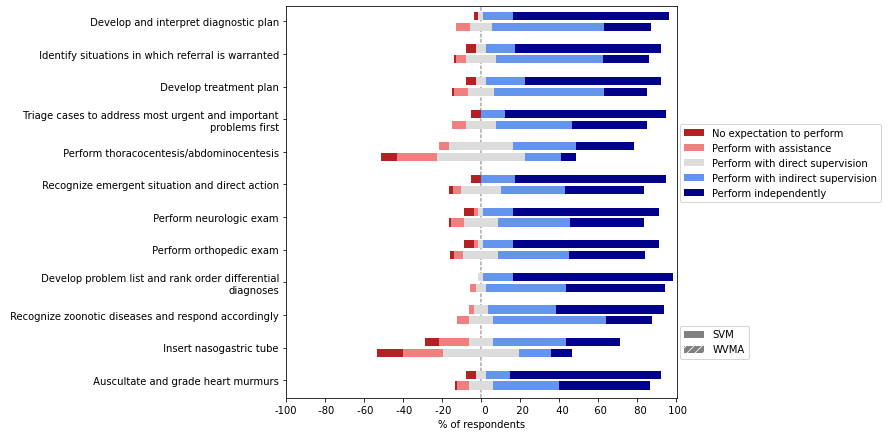

In [23]:
one_plot(df, FIGURE=1)

## Main

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


<Figure size 432x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x96 with 0 Axes>

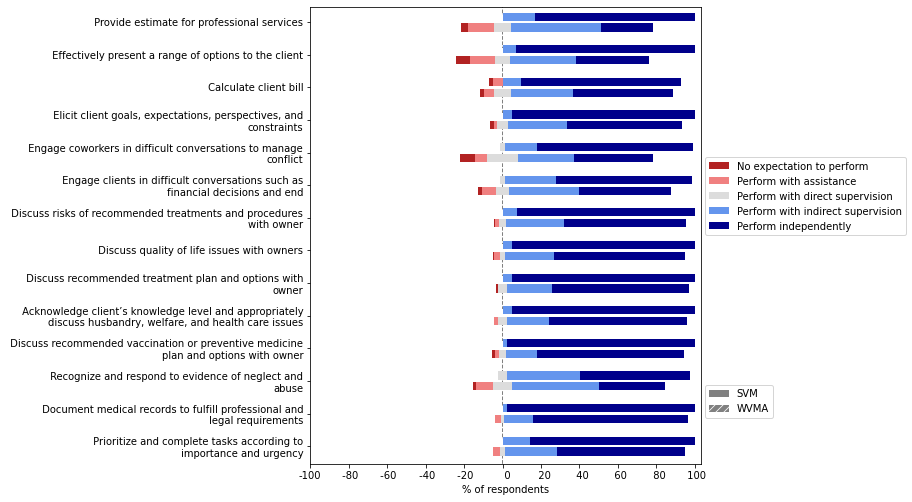

In [24]:
for fig_num in fig_nums:
    one_plot(df, FIGURE=fig_num)